<a href="https://colab.research.google.com/github/abondrn/genetics/blob/master/CellRelations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from datascience import *
import numpy as np
import random
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import scipy.stats as stats
import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/ds-connectors/Data88-Genetics_and_Genomics/master/Project_data/GSE74923_L1210_CD8_processed_data.txt', sep='\t', index_col=0)
data

,L1210_1,L1210_2,L1210_3,L1210_4,L1210_5,L1210_6,L1210_7,L1210_8,L1210_9,L1210_10,L1210_11,L1210_12,L1210_13,L1210_14,L1210_15,L1210_16,L1210_17,L1210_18,L1210_19,L1210_20,L1210_21,L1210_22,L1210_23,L1210_24,L1210_25,L1210_26,L1210_27,L1210_28,L1210_29,L1210_30,L1210_31,L1210_32,L1210_33,L1210_34,L1210_35,L1210_36,L1210_37,L1210_38,L1210_39,L1210_40,...,CD8_67,CD8_68,CD8_69,CD8_70,CD8_71,CD8_72,CD8_73,CD8_74,CD8_75,CD8_76,CD8_77,CD8_78,CD8_79,CD8_80,CD8_81,CD8_82,CD8_83,CD8_84,CD8_85,CD8_86,CD8_87,CD8_88,CD8_89,CD8_90,CD8_91,CD8_92,CD8_93,CD8_94,CD8_95,CD8_96,CD8_97,CD8_98,CD8_99,CD8_100,CD8_101,CD8_102,CD8_103,CD8_104,CD8_105,CD8_106
Itm2a,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,168.32,76.22,17.32,0.00,0.00,1.94,0.00,0.00,0.00,0.00,11.32,0.00,0.0,2.71,8.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.65,0.00,0.0,21.63,46.96,4.49,0.00,5.79,0.00,0.00,78.75,0.00,0.00,37.04,0.0,0.00,0.00,0.00
Sergef,33.01,9.70,60.20,17.12,2.39,33.71,44.70,0.0,19.92,53.29,11.32,37.87,38.85,34.36,0.0,29.41,22.31,0.00,5.68,5.56,11.77,14.97,17.32,0.00,26.15,0.00,0.00,57.34,20.11,0.00,17.88,43.04,24.46,18.62,0.00,48.78,18.66,0.00,18.30,59.08,...,0.00,27.07,17.32,2.89,0.00,0.00,0.00,0.00,37.28,10.39,9.56,88.41,0.0,0.00,6.63,0.00,0.00,0.00,0.00,0.00,0.00,1.50,40.77,2.10,0.0,0.00,28.84,0.00,0.00,30.42,29.16,0.00,0.00,13.46,50.18,24.72,0.0,33.73,0.00,0.00
Fam109a,14.01,0.00,46.77,13.91,36.47,5.61,0.00,0.0,13.49,0.00,11.52,0.00,0.00,0.00,0.0,35.98,11.95,0.00,24.32,3.40,24.01,21.99,16.96,20.25,0.00,0.00,0.00,27.00,12.26,37.37,3.63,11.23,9.32,11.33,0.00,0.00,18.99,0.00,13.07,12.58,...,0.00,80.06,0.00,26.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.93,0.0,0.00,0.00,0.00
Dhx9,20.41,32.99,5.64,14.66,36.90,24.11,40.52,99.0,50.82,29.33,35.45,35.85,8.89,32.22,0.0,17.89,32.25,17.33,16.41,51.52,16.73,77.49,30.57,56.00,21.31,0.00,0.00,53.55,30.41,45.16,35.11,50.11,66.57,34.26,29.08,15.56,47.77,1.74,39.95,13.30,...,3.90,21.97,66.49,1.75,5.07,1.33,29.83,15.00,13.22,31.49,22.59,3.95,0.0,12.07,2.29,11.55,17.41,36.85,22.19,9.17,48.41,45.95,21.66,10.55,0.0,8.76,5.81,9.11,26.11,20.43,34.67,23.53,21.36,13.95,41.93,13.95,0.0,4.79,10.94,11.98
Ssu72,171.92,156.27,112.83,178.06,125.24,132.66,169.59,0.0,113.62,199.95,75.94,169.06,122.21,92.24,0.0,136.90,160.00,159.15,171.54,195.75,165.87,177.86,76.73,152.76,134.25,207.81,169.82,188.91,159.06,258.57,98.98,108.32,135.43,202.02,155.91,205.74,162.76,83.24,73.70,131.87,...,206.75,131.70,139.44,236.05,256.14,151.90,151.60,199.53,173.06,155.85,160.42,214.69,0.0,135.90,255.43,233.19,316.25,55.68,98.41,377.85,120.47,210.07,101.67,132.34,0.0,101.09,183.87,125.74,245.74,78.74,117.41,29.55,333.27,161.23,143.52,238.11,0.0,167.98,57.99,508.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rhd,17.95,35.00,17.97,0.00,13.81,0.00,19.84,0.0,12.77,0.00,10.89,1.58,4.67,5.51,0.0,0.00,18.79,9.13,0.00,21.39,3.78,17.29,0.00,9.12,17.61,0.00,0.00,12.54,0.00,0.00,2.87,0.00,8.82,3.98,40.67,0.00,17.95,19.21,17.62,34.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.25,0.00,0.00,0.00,0.0,0.00,2.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Pxmp4,0.00,7.51,0.00,0.00,0.00,67.46,25.70,0.0,2.26,11.06,0.00,5.18,0.00,0.00,0.0,0.00,0.00,2.62,0.00,17.37,22.33,11.74,0.00,0.00,0.00,0.00,8.40,14.05,39.49,21.20,23.63,3.00,9.53,27.69,0.00,2.18,21.98,20.05,6.32,0.00,...,132.73,0.00,0.00,2.98,22.51,9.11,0.00,74.85,13.97,26.35,9.47,0.00,0.0,51.26,1.19,42.49,0.

In [0]:
LD = data.iloc[:,0 : 88]

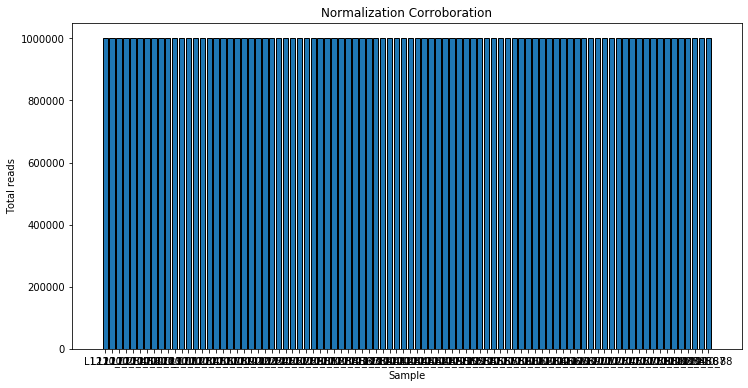

In [0]:
total_counts = np.sum(LD)

bars = list(LD.columns)                    
y_pos = np.arange(len(bars))                            

plt.figure(figsize=(12,6))                       
plt.bar(y_pos, total_counts)   
plt.xticks(y_pos, bars)                          
plt.title('Normalization Corroboration')               
plt.xlabel('Sample')                             
plt.ylabel('Total reads')                        
plt.show()

(array([1.0689e+04, 1.0910e+03, 5.4300e+02, 3.7500e+02, 2.6200e+02,
        2.8600e+02, 2.4500e+02, 2.2000e+02, 2.3700e+02, 2.3400e+02,
        2.4800e+02, 2.7300e+02, 2.4200e+02, 2.7700e+02, 2.7100e+02,
        2.9100e+02, 2.9100e+02, 3.2500e+02, 3.2500e+02, 3.5300e+02,
        3.3100e+02, 3.7700e+02, 3.7200e+02, 3.4900e+02, 3.5600e+02,
        3.3300e+02, 3.3700e+02, 2.9900e+02, 3.2700e+02, 2.9900e+02,
        2.9600e+02, 2.3900e+02, 2.4600e+02, 2.6700e+02, 2.0300e+02,
        1.9200e+02, 1.7000e+02, 1.5000e+02, 1.4200e+02, 1.3200e+02,
        1.0500e+02, 9.7000e+01, 9.7000e+01, 7.5000e+01, 7.5000e+01,
        5.7000e+01, 5.2000e+01, 3.9000e+01, 4.0000e+01, 4.4000e+01,
        2.5000e+01, 2.4000e+01, 3.4000e+01, 1.7000e+01, 1.6000e+01,
        1.5000e+01, 9.0000e+00, 7.0000e+00, 8.0000e+00, 1.3000e+01,
        1.0000e+01, 1.0000e+01, 1.4000e+01, 9.0000e+00, 1.1000e+01,
        2.0000e+00, 6.0000e+00, 5.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.00

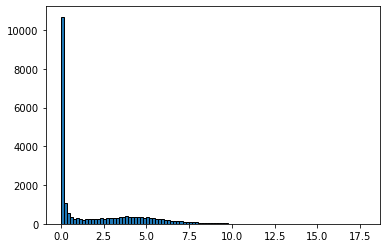

In [0]:
exp_means = np.mean(LD, axis=1)
meaned_log = np.log2(exp_means + 1)
plt.hist(meaned_log, bins=100)

(array([351., 369., 430., 410., 459., 449., 490., 471., 447., 422., 383.,
        410., 402., 315., 328., 295., 258., 199., 198., 170., 131., 125.,
        114.,  91.,  73.,  55.,  52.,  50.,  41.,  33.,  22.,  23.,  13.,
          9.,  12.,  17.,  12.,  17.,  14.,   5.,   7.,   4.,   4.,   0.,
          2.,   1.,   0.,   0.,   0.,   1.]),
 array([ 2.50025161,  2.73083606,  2.96142052,  3.19200497,  3.42258942,
         3.65317388,  3.88375833,  4.11434278,  4.34492724,  4.57551169,
         4.80609614,  5.0366806 ,  5.26726505,  5.4978495 ,  5.72843396,
         5.95901841,  6.18960286,  6.42018732,  6.65077177,  6.88135622,
         7.11194068,  7.34252513,  7.57310958,  7.80369404,  8.03427849,
         8.26486294,  8.4954474 ,  8.72603185,  8.9566163 ,  9.18720076,
         9.41778521,  9.64836966,  9.87895412, 10.10953857, 10.34012302,
        10.57070748, 10.80129193, 11.03187638, 11.26246084, 11.49304529,
        11.72362974, 11.9542142 , 12.18479865, 12.4153831 , 12.64596756,
 

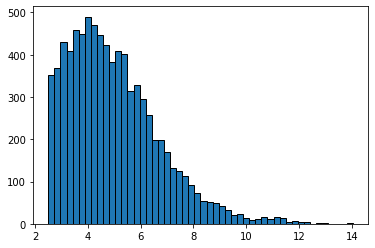

In [0]:
filtered_values = []

for i in meaned_log:
  if i > 2.5 and i < 15:
    filtered_values.append(i)

plt.hist(filtered_values, bins = 50)

In [0]:
len(filtered_values)

8184

In [0]:
boolean_values = []

for i in meaned_log:
  if i in filtered_values:
    boolean_values.append(True)
  else:
    boolean_values.append(False)

In [0]:
np.log2(data.loc[boolean_values, :].iloc[:, 0:88] + 1)

,L1210_1,L1210_2,L1210_3,L1210_4,L1210_5,L1210_6,L1210_7,L1210_8,L1210_9,L1210_10,L1210_11,L1210_12,L1210_13,L1210_14,L1210_15,L1210_16,L1210_17,L1210_18,L1210_19,L1210_20,L1210_21,L1210_22,L1210_23,L1210_24,L1210_25,L1210_26,L1210_27,L1210_28,L1210_29,L1210_30,L1210_31,L1210_32,L1210_33,L1210_34,L1210_35,L1210_36,L1210_37,L1210_38,L1210_39,L1210_40,...,L1210_49,L1210_50,L1210_51,L1210_52,L1210_53,L1210_54,L1210_55,L1210_56,L1210_57,L1210_58,L1210_59,L1210_60,L1210_61,L1210_62,L1210_63,L1210_64,L1210_65,L1210_66,L1210_67,L1210_68,L1210_69,L1210_70,L1210_71,L1210_72,L1210_73,L1210_74,L1210_75,L1210_76,L1210_77,L1210_78,L1210_79,L1210_80,L1210_81,L1210_82,L1210_83,L1210_84,L1210_85,L1210_86,L1210_87,L1210_88
Sergef,5.087887,3.419539,5.935460,4.179511,1.761285,5.117279,5.514122,0.000000,4.386811,5.762615,3.622930,5.280585,5.316508,5.144046,0.00000,4.926474,4.542877,0.000000,2.739848,2.713696,3.674687,3.997292,4.195348,0.000000,4.762880,0.000000,0.000000,5.866413,4.399855,0.000000,4.238787,5.460743,4.670161,4.294253,0.000000,5.637494,4.297191,0.000000,4.270529,5.908813,...,4.847997,0.000000,6.009661,6.025693,4.980025,3.221877,5.058749,0.000000,0.000000,0.000000,5.741467,4.916477,4.053980,6.387673,4.166715,4.997292,3.841973,3.730096,4.152995,5.159468,5.165912,5.103917,3.651913,4.188243,2.286881,0.000000,4.227279,5.443607,4.223423,5.402245,0.0,7.554128,0.0,0.000000,0.000000,0.000000,5.552746,0.000000,0.000000,9.94581
Fam109a,3.907852,0.000000,5.578033,3.898208,5.227664,2.724650,0.000000,0.000000,3.856986,0.000000,3.646163,0.000000,0.000000,0.000000,0.00000,5.208673,3.694880,0.000000,4.662205,2.137504,4.644433,4.522935,4.166715,4.409391,0.000000,0.000000,0.000000,4.807355,3.729009,5.261907,2.211012,3.612352,3.367371,3.624101,0.000000,0.000000,4.321207,0.000000,3.814550,3.763412,...,5.342341,0.000000,6.136889,4.973152,3.698218,4.898692,4.375735,1.378512,4.917432,5.526382,3.235727,3.023255,6.233044,3.582556,4.905928,4.040892,0.000000,3.998196,0.000000,0.000000,4.476382,2.606442,0.000000,3.522307,0.000000,5.654779,3.858976,0.000000,4.707635,4.943453,0.0,0.000000,0.0,4.842979,8.974759,0.000000,0.000000,4.870858,5.265662,0.00000
Dhx9,4.420213,5.087038,2.731183,3.969012,5.244126,4.650190,5.375735,6.643856,5.695437,4.922674,5.187847,5.203593,3.305971,5.053980,0.00000,4.239551,5.055282,4.196135,4.121844,5.714795,4.148121,6.294437,4.980482,5.832890,4.479619,0.000000,0.000000,5.769507,4.973152,5.528571,5.174327,5.675534,6.078311,5.139961,4.910733,4.049631,5.607922,1.454176,5.355792,3.837943,...,5.737416,5.452200,4.936873,4.271276,5.731455,4.804260,5.624393,3.025029,5.514753,6.039796,5.417515,4.875289,4.242603,2.914565,4.359662,5.329841,5.422569,5.768978,4.419539,5.593055,3.993674,5.078951,4.892391,3.600508,5.526069,3.825786,5.873813,5.307064,3.122673,3.627607,0.0,0.000000,0.0,3.886550,0.000000,0.000000,0.000000,3.913608,5.831877,0.00000
Ssu72,7.433961,7.297100,6.830737,7.484299,6.980025,7.062424,7.414389,0.000000,6.840715,7.650693,6.265662,7.409900,6.944976,6.542877,0.00000,7.107479,7.330917,7.323280,7.430787,7.620220,7.382581,7.482687,6.280400,7.264536,7.079485,7.706047,7.416333,7.569172,7.322469,8.019980,6.643568,6.772414,7.092017,7.665478,7.293793,7.691674,7.355439,6.396434,6.223036,7.053872,...,7.793051,8.011786,7.608809,7.024142,7.168020,6.954778,7.264161,7.875719,7.299941,7.706254,7.591859,7.517512,7.360891,7.324721,7.906650,7.036174,7.292414,7.197512,7.501917,7.338514,6.919340,6.336819,7.408202,7.691395,8.049195,6.522621,7.233428,7.804518,6.522935,7.449561,0.0,7.563540,0.0,7.837123,9.707428,6.366497,7.859100,7.132063,8.754854,0.00000
Eif2b2,6.742141,5.888743,6.005625,6.697246,6.551824,7.368070,6.588865,0.000000,6.474112,7.126601,5.993901,6.663487,6.095080,5.888013,0.00000,5.497293,6.383359,6.985045,5.876517,6.832510,5.476382,5.885818,6.552592,7.269875,5.550901,0.000000,7.804647,7.110718,5.527008,6.235536,6.286512,6.649184,6.217812,6.534186,7.139551,6.971773,7.014802,7.215387,5.612942,6.266599,...,6.917074,0.000000,5.773733,6.062424,6.27